MACHINE LEARNING MODEL ANALYSIS:

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
usedcars = pd.read_csv('outliers_cleaned_usedcars.csv')

In [2]:
usedcars.bt.unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Wagon'], dtype=object)

In [49]:
usedcars['Miscellaneous_Miscellaneous_Rear Brake Type'].unique()

array(['Drum', 'Solid Disc', 'Discs', 'Disc & Caliper Type', 'Disc',
       'Ventilated discs', 'Ventilated Disc', 'Leading-Trailing Drum',
       'self adjusting drums', 'Self Adjusting Drum', 'Drums 180 mm',
       'Drums', 'Self-Adjusting Drum', 'Ventilated Discs',
       'Booster assisted drum', 'Leading & Trailing Drum', 'disc', 'drum',
       'Disc & Drum', 'Drum ', 'Ventilated Drum', 'Ventilated Disc ',
       'Vacuum assisted hydraulic dual circuit w', 'Drum in Discs',
       'Self Adjusting Drums', 'Mechanical-hydraulic dual circuit',
       'Ventialte Disc', 'Electric Parking Brake', 'Drum in disc',
       '228.6 mm dia, drums on rear wheels'], dtype=object)

In [3]:
usedcars.shape

(7304, 39)

FEATURE SELECTION:
Correlation Analysis: Identified highly correlated numerical features.

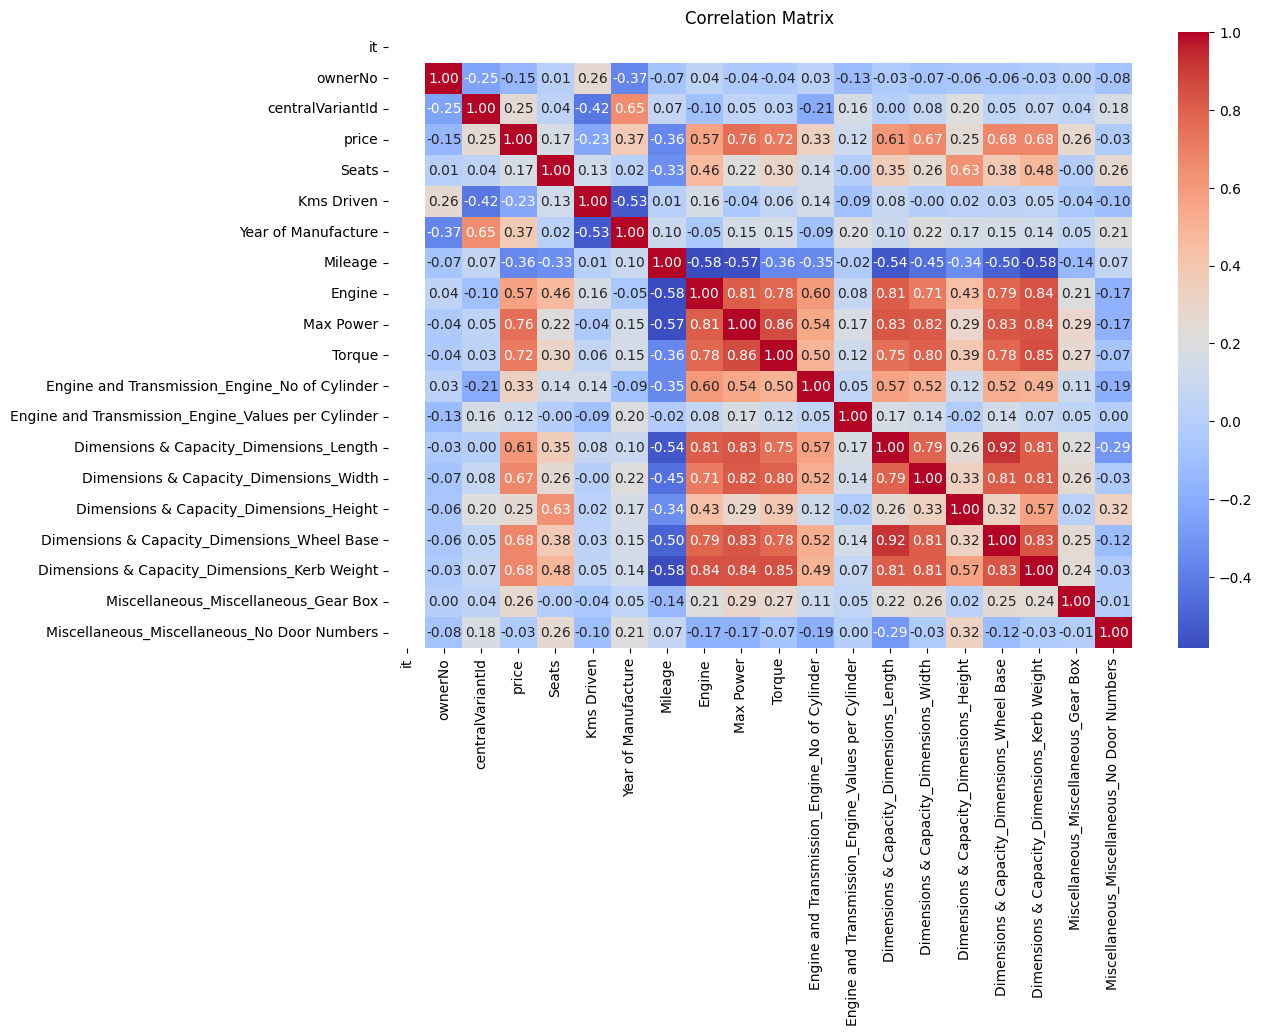

Features highly correlated with price: ['Engine', 'Max Power', 'Torque', 'Dimensions & Capacity_Dimensions_Length', 'Dimensions & Capacity_Dimensions_Width', 'Dimensions & Capacity_Dimensions_Wheel Base', 'Dimensions & Capacity_Dimensions_Kerb Weight']


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation analysis
numeric_cols = usedcars.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = usedcars[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Extracting features with high correlation with 'price'
correlation_threshold = 0.5
high_corr_features = correlation_matrix.index[abs(correlation_matrix['price']) > correlation_threshold].tolist()

# Remove 'price' from the list
high_corr_features.remove('price')
print("Features highly correlated with price:", high_corr_features)


ANOVA Test: Selected significant categorical features based on ANOVA results.

In [5]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

# Identify numerical columns based on their data types
numerical_features = usedcars.select_dtypes(include=['float64', 'int64']).columns
numerical_features = [col for col in numerical_features if col != 'price']  # Exclude the target variable 'price'

# Apply Label Encoding to categorical features
categorical_features = usedcars.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Encode each categorical feature
for col in categorical_features:
    usedcars[col] = label_encoder.fit_transform(usedcars[col])

# Combine encoded categorical features with numerical features
usedcars_encoded = pd.concat([usedcars[numerical_features], usedcars[categorical_features], usedcars['price']], axis=1)

# Apply ANOVA test
anova_results = {}
for feature in usedcars_encoded.columns:
    if feature != 'price':  # Exclude the target variable
        groups = [usedcars_encoded['price'][usedcars_encoded[feature] == value] for value in usedcars_encoded[feature].unique()]
        try:
            f_val, p_val = stats.f_oneway(*groups)
            anova_results[feature] = {'F-Score': f_val, 'P-Value': p_val}
        except TypeError as e:
            print(f"Error with feature {feature}: {e}")
            anova_results[feature] = {'F-Score': None, 'P-Value': None}

# Filter features with significant p-values (< 0.05)
significant_features = {feature: results for feature, results in anova_results.items() if results['P-Value'] is not None and results['P-Value'] < 0.05}

# Sort by F-Score in descending order and select top 15 features
top_features = sorted(significant_features.items(), key=lambda x: x[1]['F-Score'], reverse=True)[:15]

# Print all results
print("All ANOVA Results:")
for feature, results in anova_results.items():
    print(f"Feature: {feature}, F-Score: {results['F-Score']}, P-Value: {results['P-Value']}")

# Hypothesis Testing and Interpretation
print("\nHypothesis Testing Interpretation:")

for feature, results in anova_results.items():
    if results['P-Value'] is not None:
        if results['P-Value'] < 0.05:
            print(f"Feature: {feature} - Reject the null hypothesis (H₀). This feature significantly affects the car price (F-Score: {results['F-Score']:.4f}, P-Value: {results['P-Value']:.4f}).")
        else:
            print(f"Feature: {feature} - Fail to reject the null hypothesis (H₀). This feature does not significantly affect the car price (F-Score: {results['F-Score']:.4f}, P-Value: {results['P-Value']:.4f}).")
    else:
        print(f"Feature: {feature} - ANOVA test could not be performed due to data type issues.")

print("\nTop 15 Significant Features from ANOVA:")
for feature, results in top_features:
    print(f"Feature: {feature}, F-Score: {results['F-Score']}, P-Value: {results['P-Value']}")


Error with feature it: At least two samples are required; got 1.
Error with feature Power Steering: At least two samples are required; got 1.
Error with feature Air Conditioner: At least two samples are required; got 1.
Error with feature Heater: At least two samples are required; got 1.
Error with feature Comfort & Convenience_Comfort_Low Fuel Warning Light: At least two samples are required; got 1.
Error with feature Interior_Interior_Glove Compartment: At least two samples are required; got 1.
Error with feature Safety_Safety_Rear Seat Belts: At least two samples are required; got 1.
All ANOVA Results:
Feature: it, F-Score: None, P-Value: None
Feature: ownerNo, F-Score: 32.399820661021785, P-Value: 8.711928747344134e-33
Feature: centralVariantId, F-Score: 55.28483881011992, P-Value: 0.0
Feature: Seats, F-Score: 57.68069599470994, P-Value: 7.116213644814584e-81
Feature: Kms Driven, F-Score: 0.7879838579552498, P-Value: 0.9999999999996462
Feature: Year of Manufacture, F-Score: 64.3931

Feature Importance from Models: Identified top features from Random Forest 


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

# Identify numerical columns based on their data types
numerical_features = usedcars.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'price']  # Exclude the target variable 'price'

# Apply Label Encoding to categorical features
categorical_features = usedcars.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

# Encode each categorical feature
for col in categorical_features:
    usedcars[col] = label_encoder.fit_transform(usedcars[col])

# Combine encoded categorical features with numerical features
X = usedcars[numerical_features + categorical_features]  # No need for .tolist()
y = usedcars['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features
print("Top Features based on RandomForestRegressor Importance:")
print(importance_df.head(20))  # Show top 15 features


Top Features based on RandomForestRegressor Importance:
                                         Feature  Importance
8                                      Max Power    0.646036
5                            Year of Manufacture    0.118385
13        Dimensions & Capacity_Dimensions_Width    0.054785
15   Dimensions & Capacity_Dimensions_Wheel Base    0.017114
2                               centralVariantId    0.016235
4                                     Kms Driven    0.016134
12       Dimensions & Capacity_Dimensions_Length    0.015232
16  Dimensions & Capacity_Dimensions_Kerb Weight    0.012654
17          Miscellaneous_Miscellaneous_Gear Box    0.012377
9                                         Torque    0.012143
23                                   variantName    0.011403
14       Dimensions & Capacity_Dimensions_Height    0.010018
6                                        Mileage    0.009575
37         Miscellaneous_Miscellaneous_Tyre Type    0.007215
19                           

Final Feature Selection: Combined all these insights to finalize the features.
This approach ensures that the most impactful features are chosen for predicting car prices.


In [8]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

# Identify numerical columns based on their data types
numerical_features = usedcars.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'price']  # Exclude the target variable 'price'

# Apply Label Encoding to categorical features
categorical_features = usedcars.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

# Encode each categorical feature
for col in categorical_features:
    usedcars[col] = label_encoder.fit_transform(usedcars[col])

# Combine encoded categorical features with numerical features
X = usedcars[numerical_features + categorical_features]  # No need for .tolist()
y = usedcars['price']

# Hypothesis Testing Using ANOVA
anova_results = {}
print("Hypothesis Testing using ANOVA:")

for feature in X.columns:
    groups = [y[X[feature] == value] for value in X[feature].unique()]
    try:
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[feature] = {'F-Score': f_val, 'P-Value': p_val}
        # Print Hypothesis Test Results
        print(f"Feature: {feature}, F-Score: {f_val:.4f}, P-Value: {p_val:.4e}")
    except TypeError as e:
        print(f"Error with feature {feature}: {e}")
        anova_results[feature] = {'F-Score': None, 'P-Value': None}

# Filter features with significant p-values (< 0.05)
significant_features_anova = {feature: results for feature, results in anova_results.items() if results['P-Value'] is not None and results['P-Value'] < 0.05}

# Sort by F-Score in descending order and select top features from ANOVA
top_features_anova = sorted(significant_features_anova.items(), key=lambda x: x[1]['F-Score'], reverse=True)

# RandomForestRegressor for Feature Importance
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Features based on RandomForestRegressor Importance:")
print(importance_df.head(15))  # Show top 15 features

# Combining ANOVA and RandomForestRegressor Results
# Select top 10 features from both ANOVA and RandomForest results to combine them
top_anova_features = [feature for feature, _ in top_features_anova[:10]]
top_rf_features = importance_df['Feature'].head(10).tolist()

# Combine top features from both methods
combined_top_features = list(set(top_anova_features + top_rf_features))

print("\nTop 20 Combined Features from ANOVA and RandomForestRegressor:")
print(combined_top_features)


Hypothesis Testing using ANOVA:
Error with feature it: At least two samples are required; got 1.
Feature: ownerNo, F-Score: 32.3998, P-Value: 8.7119e-33
Feature: centralVariantId, F-Score: 55.2848, P-Value: 0.0000e+00
Feature: Seats, F-Score: 57.6807, P-Value: 7.1162e-81
Feature: Kms Driven, F-Score: 0.7880, P-Value: 1.0000e+00
Feature: Year of Manufacture, F-Score: 64.3932, P-Value: 6.3077e-250
Feature: Mileage, F-Score: 21.2638, P-Value: 0.0000e+00
Feature: Engine, F-Score: 114.3882, P-Value: 0.0000e+00
Feature: Max Power, F-Score: 89.3700, P-Value: 0.0000e+00
Feature: Torque, F-Score: 66.2843, P-Value: 0.0000e+00
Feature: Engine and Transmission_Engine_No of Cylinder, F-Score: 169.5753, P-Value: 1.4784e-202
Feature: Engine and Transmission_Engine_Values per Cylinder, F-Score: 45.0250, P-Value: 8.0051e-29
Feature: Dimensions & Capacity_Dimensions_Length, F-Score: 108.1553, P-Value: 0.0000e+00
Feature: Dimensions & Capacity_Dimensions_Width, F-Score: 116.1087, P-Value: 0.0000e+00
Feat

In [10]:
usedcars.centralVariantId.unique()

array([3979, 6087, 2983, ..., 6716, 8568, 4672])

In [14]:
# Correct syntax using bracket notation
usedcars['Miscellaneous_Miscellaneous_Rear Brake Type'].unique()



array([ 6, 19,  5,  3,  2, 26, 22, 14, 29, 16, 11, 10, 18, 24,  1, 13, 27,
       28,  4,  7, 25, 23, 20,  8, 17, 15, 21, 12,  9,  0])

In [15]:
usedcars['Engine'].unique()

array([ 998., 1497., 1199., 1197., 1248., 1956., 1198., 1462., 2179.,
       1950., 1396., 1995., 1498., 1086., 1991., 1968., 1998., 2982.,
       1461., 1797.,  796., 1353., 2987., 2967.,  999., 1341., 1496.,
       1582., 1798., 1120., 1969., 1451.,  814., 1999., 1591., 1397.,
       1368., 1598., 3198., 2993., 2755., 2143., 2354., 1332., 2199.,
       1997., 1499., 2148., 2696., 1364., 2494., 1373., 1299., 1061.,
       1493., 2497., 1495., 1590., 1330., 1781., 1390., 2953., 1399.,
       1595.,    0., 1196., 1984., 2694., 1298., 2198., 1599.,  993.,
       2393., 1389., 1597., 2523., 1586.,  995., 2499., 2998., 1589.,
        624., 1596.,  799., 3597., 2184., 1405., 1047., 2200., 1108.,
       2498., 2400., 1194., 1996., 1395., 1186., 1799., 2925., 2999.,
       1896., 1482.,  793.,  936., 4134., 1796., 1172., 1468., 1193.,
       2477., 2997., 2487., 1794., 3982., 3346., 3498., 2979., 1349.,
       2360., 2157., 1985., 2359., 2995., 2609., 2956., 2231., 2446.,
       2835., 1150.,

In [17]:
usedcars['Fuel Type'].unique()

array([4, 1, 3, 0, 2])

In [18]:
usedcars['Max Power'].unique()

array([ 67.04      , 121.31      ,  84.        ,  81.86      ,
        88.5       , 170.        ,  67.        , 118.35      ,
       103.25      ,  83.1       ,  88.7       ,  83.83      ,
       140.        , 187.74      ,  88.76      , 117.3       ,
       177.        , 104.55      ,  68.        ,  62.1       ,
       194.4       , 174.33      , 167.67      , 103.        ,
       194.        , 248.08      , 171.        , 108.5       ,
        81.83      ,  88.73      , 147.5       ,  47.33      ,
       120.        , 189.08      , 138.08      ,  46.3       ,
       254.8       , 241.4       ,  83.        ,  65.71      ,
       103.52      , 120.69      , 126.2       ,  74.        ,
       188.        , 178.        ,  85.8       , 118.36      ,
       116.3       , 103.6       , 108.6       ,  70.        ,
        82.85      ,  77.        ,  68.05      , 190.        ,
       141.        ,  86.8       ,  67.1       ,  71.01      ,
        55.2       , 103.2       , 105.5       , 167.68

In [20]:
usedcars['Year of Manufacture'].unique()

array([2015., 2018., 2014., 2020., 2017., 2021., 2019., 2022., 2016.,
       2011., 2009., 2013., 2010., 2008., 2006., 2012., 2005., 2007.,
       2023., 2004., 2003., 2002.])

In [21]:
usedcars['Engine and Transmission_Engine_No of Cylinder'].unique()

array([3., 4., 6., 5., 2., 7., 8.])

In [22]:
usedcars['Kms Driven'].unique()

array([120000.,  32706.,  11949., ...,  53562.,  32190., 151000.])

In [32]:
usedcars['Insurance Validity'].unique()

array([5, 2, 4, 6, 1, 0, 3])

In [23]:
usedcars.shape

(7304, 39)

In [24]:
usedcars['Transmission'].unique()

array([1, 0])

In [25]:
usedcars['Miscellaneous_Miscellaneous_Gear Box'].unique()

array([ 5.,  6.,  7.,  4.,  8.,  9., 77., 10., 51.])

In [26]:
usedcars['bt'].unique()

array([2, 6, 7, 3, 1, 4, 5, 0, 8])

In [27]:
usedcars['oem'].unique()

array([20,  6, 29,  9, 12,  4,  8, 17, 21,  1, 27,  0, 30, 22, 13, 28, 31,
       32, 16, 24,  5, 19, 23, 11, 14,  2,  3, 25, 18, 10, 15, 26,  7])

In [29]:
usedcars['city'].unique()

array([0, 1, 2, 3, 4, 5])

In [34]:
usedcars['ownerNo'].unique()

array([3, 2, 1, 4, 5, 0])

In [35]:
usedcars['Seats'].unique()

array([ 5,  7,  4,  6,  8, 10,  9,  2])

In [30]:
usedcars.head()

,city,it,bt,ownerNo,oem,model,centralVariantId,variantName,price,Insurance Validity,...,Dimensions & Capacity_Dimensions_Length,Dimensions & Capacity_Dimensions_Width,Dimensions & Capacity_Dimensions_Height,Dimensions & Capacity_Dimensions_Wheel Base,Dimensions & Capacity_Dimensions_Kerb Weight,Miscellaneous_Miscellaneous_Gear Box,Miscellaneous_Miscellaneous_Front Brake Type,Miscellaneous_Miscellaneous_Rear Brake Type,Miscellaneous_Miscellaneous_Tyre Type,Miscellaneous_Miscellaneous_No Door Numbers
0,0,0,2,3,20,148,3979,1624,400000.0,5,...,3715.0,1635.0,1565.0,2425.0,835.0,5.0,20,6,19,5.0
1,0,0,6,2,6,47,6087,257,811000.0,2,...,3998.0,1765.0,1647.0,2519.0,1242.0,5.0,20,6,22,4.0
2,0,0,2,1,29,249,2983,114,585000.0,2,...,3746.0,1647.0,1535.0,2400.0,1012.0,5.0,4,6,12,5.0
3,0,0,7,1,9,83,1867,89,462000.0,2,...,3995.0,1660.0,1520.0,2425.0,1180.0,5.0,5,6,22,4.0
4,0,0,6,1,20,163,4277,883,790000.0,5,...,4300.0,1785.0,1595.0,2600.0,1230.0,5.0,20,19,22,5.0


MACHINE LEARNING MODELS:
Handling Ordinal Categorical Features: LabelEncoder is suitable when the categorical variables have an ordinal relationship (e.g., low, medium, high). It transforms categories into numerical labels that reflect their rank or order, which is useful when some of your categorical features have an inherent ranking.

Reducing Dimensionality: OneHotEncoder creates a new binary column for each category level, which can lead to a significant increase in dimensionality when the dataset contains many unique categories. LabelEncoder maps categories to integers, keeping the number of columns unchanged and reducing the risk of the "curse of dimensionality."

Efficiency in Model Training: With a large number of categories, OneHotEncoder may create sparse matrices that could negatively affect model performance and computational efficiency. LabelEncoder provides a more compact representation, which is computationally more efficient for models that can handle ordinal encoded data effectively.

Suitable for Tree-based Algorithms: If you're using algorithms like Decision Trees, Random Forest, or Gradient Boosting, they can handle label-encoded data well without needing one-hot encoded columns. These models are not sensitive to the magnitude of the values and can still capture non-linear relationships.

Avoiding Multicollinearity: By using LabelEncoder instead of OneHotEncoder, you prevent the creation of highly correlated dummy variables, reducing the risk of multicollinearity issues in linear models.

STANDARD SCALAR:
Centers Data Around Zero: Scales data to have a mean of 0 and a standard deviation of 1, making it useful when your features have different units or different scales.
Less Sensitive to Outliers: Less affected by outliers compared to Min-Max Scaling.

GRIDSEARCHCV:
The performance of machine learning models depends significantly on the choice of hyperparameters (e.g., learning rate, number of estimators, maximum depth in Decision Trees, and regularization strength in Linear Models). GridSearchCV helps in finding the optimal set of hyperparameters that lead to the best performance metrics, such as R², Mean Squared Error (MSE), and Mean Absolute Error (MAE) for regression tasks.
By comparing the performance of models with different hyperparameters using the same cross-validation strategy, you can use GridSearchCV to select not only the best hyperparameters but also the best model for your task. This helps in choosing a model that balances bias and variance effectively and provides the best prediction accuracy.

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

# Identify numerical and categorical columns
numerical_features = usedcars.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = usedcars.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    usedcars[col] = le.fit_transform(usedcars[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = usedcars[['city', 'bt', 'Year of Manufacture', 'Transmission', 'Fuel Type', 'ownerNo', 'Seats','Engine','Max Power'
             ]]
y = usedcars['price']

# Handle missing values
X = X.fillna(X.median())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Define hyperparameters for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Lasso': {
        'alpha': [0.1, 1, 10]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Training and evaluation with cross-validation
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.4f}")
    print(f"R^2 Score: {metrics['R2']:.4f}")


Training Linear Regression...
Training Lasso...
Training Ridge...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Linear Regression:
Best Parameters: {}
Mean Squared Error: 244321820911.2637
Mean Absolute Error: 294100.8381
R^2 Score: 0.6626

Lasso:
Best Parameters: {'alpha': 10}
Mean Squared Error: 244318315031.4037
Mean Absolute Error: 294094.0124
R^2 Score: 0.6626

Ridge:
Best Parameters: {'alpha': 10}
Mean Squared Error: 244148261638.8467
Mean Absolute Error: 293928.5448
R^2 Score: 0.6629

Decision Tree:
Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Mean Squared Error: 129554391704.1326
Mean Absolute Error: 168799.9261
R^2 Score: 0.8211

Random Forest:
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 80139355485.7807
Mean Absolute Error: 140347.6932
R^2 Score: 0.8893

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the CSV file into a DataFrame
usedcars = pd.read_csv(r'C:\CARPRICEPREDICTION\virtualenvironment\outliers_cleaned_usedcars.csv')

X = usedcars[['city', 'bt', 'Year of Manufacture', 'Transmission', 'Fuel Type', 'ownerNo', 'Seats','Engine','Max Power']]
y = usedcars['price']

# Convert categorical features to numeric using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle any non-numeric values
    label_encoders[col] = le



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Define hyperparameters for GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Training and evaluation with cross-validation
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.4f}")
    print(f"R^2 Score: {metrics['R2']:.4f}")

# Choose the best model based on R^2 score
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name].set_params(**results[best_model_name]['Best Parameters'])

# Train the best model on the full training data
best_model.fit(X_train_scaled, y_train)

# Save the best model, scaler, and label encoders as pickle files
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

print(f"\nBest model: {best_model_name}")
print(f"Model, scaler, and label encoders have been saved as pickle files.")


Training Linear Regression...
Training Lasso...
Training Ridge...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Linear Regression:
Best Parameters: {}
Mean Squared Error: 249623764469.9768
Mean Absolute Error: 293462.9954
R^2 Score: 0.6553

Lasso:
Best Parameters: {'alpha': 10}
Mean Squared Error: 249620491417.0226
Mean Absolute Error: 293456.5658
R^2 Score: 0.6553

Ridge:
Best Parameters: {'alpha': 10}
Mean Squared Error: 249460939651.8921
Mean Absolute Error: 293289.4121
R^2 Score: 0.6555

Decision Tree:
Best Parameters: {'max_depth': 30, 'min_samples_split': 10}
Mean Squared Error: 114257056742.6481
Mean Absolute Error: 157769.6742
R^2 Score: 0.8422

Random Forest:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 73824210806.6222
Mean Absolute Error: 133807.5506
R^2 Score: 0.8981

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
M